In [76]:
# Import robot_python_code.py
from robot_python_code import DataLoader
from data_handling import files_and_data

In [77]:
trial_data = []

for file, distance in files_and_data:
    data = DataLoader('./data_straight/' + file).load()
    encoder_counts = abs(data['robot_sensor_signal'][-1].encoder_counts - data['robot_sensor_signal'][0].encoder_counts)
    time = data['time'][-1] - data['time'][0]
    speed, steer = data['control_signal'][0]
    trial_data.append({'encoder_counts' : encoder_counts, 'distance' : distance, 'speed': speed, 'steer': steer, 'time': time })

trial_data = sorted(trial_data, key=lambda x: x['encoder_counts'])
# print(*trial_data, sep="\n")


In [78]:
import matplotlib.pyplot as plt

x_data = [trial['encoder_counts'] for trial in trial_data]
y_data = [trial['distance'] for trial in trial_data]

print(x_data)
print(y_data)

# plt.xlabel(f'Encoder Count $e$')
# plt.ylabel(f'Distance $s$ (meters)')
# plt.title('Distance Traveled vs Encoder Count')

# plt.plot(x_data, y_data, marker='o')

[465, 477, 479, 494, 496, 699, 740, 765, 811, 988, 2204]
[0.65, 0.67, 0.68, 0.69, 0.7, 1.0, 1.03, 1.07, 1.13, 1.38, 1.09]


Coefficients: [ 0.00000000e+00  1.83280417e-03 -6.01987933e-07]


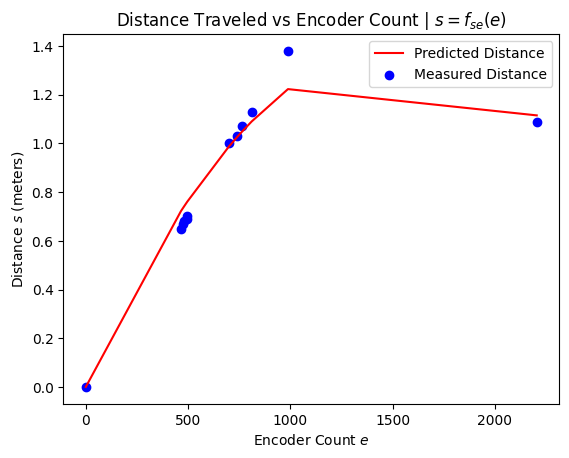

In [79]:
import numpy as np
from numpy.polynomial import Polynomial

x_data = np.array(x_data, dtype=np.float64)
y_data = np.array(y_data, dtype=np.float64)

# Add (0, 0) to the data
x_data = np.array([0, *x_data])
y_data = np.array([0, *y_data])

# Design matrix for degree 2 without constant term
X = np.vstack([x_data, x_data**2]).T  # columns: x, x^2

# Solve least squares
coeffs = np.linalg.lstsq(X, y_data, rcond=None)[0]

# Create polynomial (c0 = 0)
p = Polynomial([0, *coeffs])  # c0=0, c1=coeffs[0], c2=coeffs[1]


y_pre = p(x_data)

print("Coefficients:", p.coef)
plt.plot(x_data, y_pre, label='Predicted Distance', color='red')
plt.scatter(x_data, y_data, label='Measured Distance', color='blue')
plt.legend()

plt.xlabel(f'Encoder Count $e$')
plt.ylabel(f'Distance $s$ (meters)')
plt.title(f'Distance Traveled vs Encoder Count | $s = f_{{se}}(e)$')

plt.show()

In [80]:
#  Standard deviation of errors
sigma2 = (y_data - y_pre) ** 2

print(sigma2)

# plt.plot(x_data, sigma2, marker='o')
# plt.xlabel(f'Encoder Count $e$')
# plt.ylabel(f'Error Variance $\sigma_s^2$')
# plt.title('Error Variance vs Encoder Count')
# plt.show()

[0.00000000e+00 5.19683786e-03 4.52631248e-03 3.57514096e-03
 4.69204877e-03 3.71760958e-03 1.69046635e-04 1.13805613e-05
 4.08169313e-04 1.56308945e-03 2.45913808e-02 6.38783593e-04]


Error Coefficients: [ 0.04614334  0.24149358  0.25782949 -0.24116018 -0.30366596]


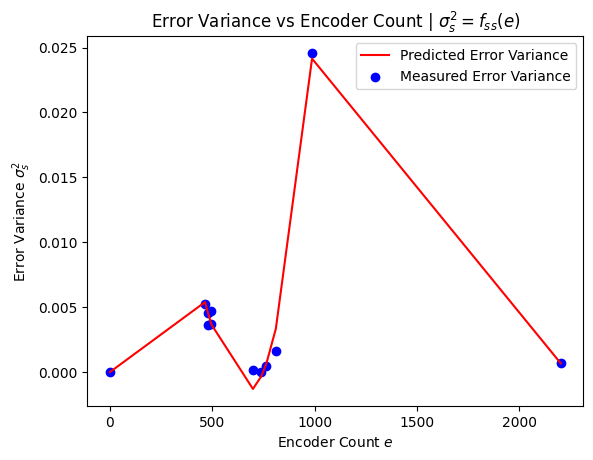

In [81]:
p = Polynomial.fit(x_data, sigma2, deg=4)
print("Error Coefficients:", p.coef)
y_fit = p(x_data)

plt.plot(x_data, y_fit, label='Predicted Error Variance', color='red')
plt.scatter(x_data, sigma2, marker='o', label='Measured Error Variance', color='blue')
plt.xlabel(f'Encoder Count $e$')
plt.ylabel(f'Error Variance $\sigma_s^2$')
plt.title(f'Error Variance vs Encoder Count | $\sigma_s^2 = f_{{ss}}(e)$')
plt.legend()
plt.show()
